<a href="https://colab.research.google.com/github/svhenrique/pi-opencv-basic/blob/main/OperacoesMorfologicas_PI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sobre o projeto

* Foi implementado funções com base nos algoritmos de erosão, dilatação, abertura e fechamento.
* Utilizando um elemento estruturante e uma imagem de entrada, é possível aplicar as operações morfológicas de erosão, dilatação, abertura e fechamento e obter uma imagem resultante.
* Os algoritmos podem ser encontrados na célula de nome Fontes.

Fontes:

*   https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1
*   https://www.mathworks.com/help/images/morphological-dilation-and-erosion.html
*   https://www.geeksforgeeks.org/erosion-dilation-images-using-opencv-python/
*   https://docs.opencv.org/master/d4/d76/tutorial_js_morphological_ops.html
*   https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html



## Preparando ambiente

In [160]:
# detectando drive
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importando bibliotecas 
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import os
from PIL import Image

## Preparando imagens 

In [ ]:
# caminho de pasta imagens
image_path = "/content/drive/My Drive/images/"

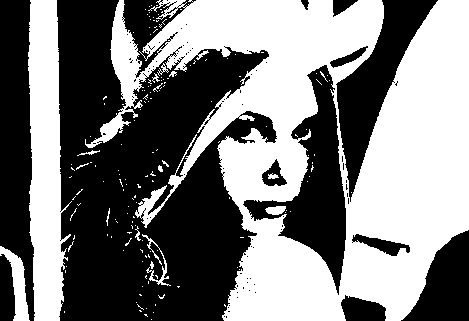

In [ ]:
# lendo imagem Lenna e convertendo para preto e branco (binário)
# lembrando que a converção para preto e branco (binário) utiliza pesos com resultados empíricos
lena = cv2.imread(image_path + 'lena.jpg')
lena = cv2.resize(lena, None, fx=.52, fy=.52)
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
ret,lena = cv2.threshold(lena,100,255,cv2.THRESH_BINARY)
cv2_imshow(lena)

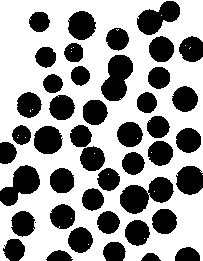

In [ ]:
# lendo imagem coins e convertendo para binário
coins = cv2.imread(image_path + 'coins.jpg')
coins = cv2.resize(coins, None, fx=.52, fy=.52)
coins = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
ret,coins = cv2.threshold(coins,100,255,cv2.THRESH_BINARY)
cv2_imshow(coins)

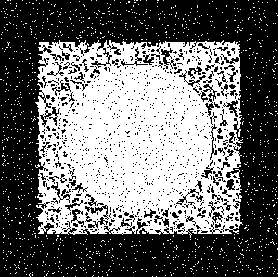

In [179]:
# lendo imagem ruído e convertendo para preto e branco (binário)
# lembrando que a converção para preto e branco (binário) utiliza pesos com resultados empíricos
ruido = cv2.imread(image_path + 'ruido.png')
ruido = cv2.resize(ruido, None, fx=.52, fy=.52)
ruido = cv2.cvtColor(ruido, cv2.COLOR_BGR2GRAY)
ret,ruido = cv2.threshold(ruido,126,255,cv2.THRESH_BINARY)
cv2_imshow(ruido)

## Preparando máscara

* Classe Mask criada para representar o kernel (ou máscara) que será usada na operação morfológica.
  * Classe tem informações que serão utilizadas na implementação do algoritmo.

In [ ]:
class Mask:
  """
    Máscara que sempre terá o pixel alvo no centro
    mask: kernel usado para processamento
    up_down: quantas linhas existem acima e a baixo do alvo 
    left_right: quantas colunas existem aos lados do alvo
  """
  mask = []
  up_down = 0
  left_right = 0

  def __init__(self, mask):
    self.mask = mask
    self.up_down = len(mask)//2
    self.left_right = len(mask)//2

## Erosão

* Função kernel_erosion_aplication, operação de erosão, faz a aplicação da máscara em um pixel central.
* Função erosion, utiliza a função kernel_erosion_aplication por toda a imagem.

In [181]:
def kernel_erosion_aplication(image, mask, row, pixel):

  """
    Se os 1's da máscara estiverem posicionados igualmente com os 255 da imagem, retornará 255
    se não, retornará 0
  """

  shape = image.shape
  top_area = (row - mask.up_down)
  bottom_area = (row + mask.up_down)
  left_area = (pixel - mask.left_right)
  right_area = (pixel + mask.left_right)

  # se a máscara não couber na área para processar, retorne 0
  if top_area < 0 or left_area < 0 or bottom_area >= shape[0] or right_area >= shape[1]:
    return 0
  
  # area da imagem com máscara
  masked_area = [row[left_area:right_area+1] for row in image[top_area:bottom_area+1]]

  mask = mask.mask
  rows = len(mask)

  for row in range(rows):
    for pixel in range(len(mask[row])):      

      # se a máscara apontar para o elemento 1 mas o pixel apontado for 0, retorne 0
      if mask[row][pixel] == 1 and masked_area[row][pixel] == 0:
        return 0

  # se todas as operações para retorno do 0 não acontecerem, retorne 255
  return 255

def erosion(mask, image):
  shape = image.shape
  image_list = image.tolist()
  result = []

  # percorre os pixels da imagem e processa usando a máscara
  for row in range(shape[0]):
      result_row = []
      for pixel in range(len(image_list[row])):
        masked_area_result = kernel_erosion_aplication(image, mask, row, pixel)
        result_row.append(masked_area_result)
      result.append(result_row)

  # retorna array para formato conhecido pelo opencv
  return np.asarray(result,  dtype=np.uint8)

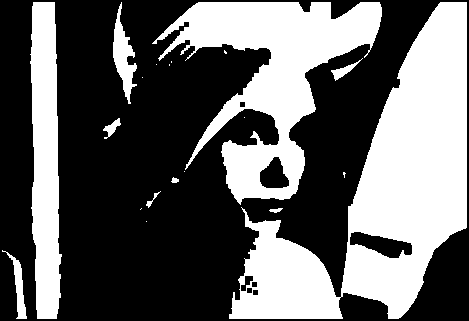

In [ ]:
# utilizando máscara 5x5 com matriz em listas no python
mask = [[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1], 
        [1, 1, 1, 1, 1], 
        [1, 1, 1, 1, 1]]

# fazendo operação de erosão
mask = Mask(mask)
lena_erosion = erosion(mask, lena)
cv2_imshow(lena_erosion)

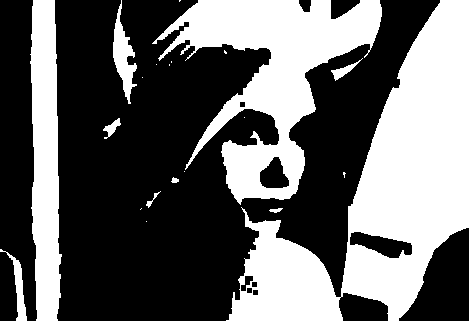

In [ ]:
# utilizando máscara 5x5 do numpy 
# processando erosão da mesma imagem anterior com opencv
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(lena,kernel, iterations=1)
cv2_imshow(erosion)

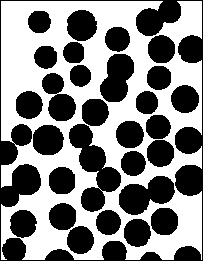

In [ ]:
# utilizando máscara 3x3 com matriz em listas no python
mask = [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]

# fazendo operação de erosão
mask = Mask(mask)
coins_erosion = erosion(mask, coins)
cv2_imshow(coins_erosion)

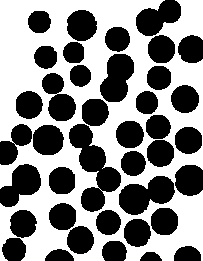

In [ ]:
# utilizando máscara 3x3 do numpy 
# processando erosão da mesma imagem anterior com opencv
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(coins,kernel, iterations=1)
cv2_imshow(erosion)

## Dilatação

* Função kernel_dilation_aplication, operação de dilatação, faz a aplicação da máscara em um pixel central.
* Função dilation, utiliza a função kernel_dilation_aplication por toda a imagem.

In [ ]:
def kernel_dilation_aplication(image, mask, row, pixel):

  """
    Se os 1's da máscara estiverem posicionados com ao menos um pixel de 255 da imagem, retornará 255
    se não, retornará 0
  """

  shape = image.shape
  top_area = row - mask.up_down
  bottom_area = row + mask.up_down
  left_area = pixel - mask.left_right
  right_area = pixel + mask.left_right
  mask = [row.copy() for row in mask.mask]

  # caso existam colunas faltantes na parte de cima
  if top_area < 0:
    mask = mask[abs(top_area):]
    top_area += abs(top_area)
    
  # caso existam linhas faltantes no fundo 
  elif bottom_area >= shape[0]:
    mask = mask[:(bottom_area - shape[0] - 1)]
    bottom_area -= bottom_area - shape[0] - 1

  # caso existam colunas faltantes a esquerda
  if left_area < 0:
    for row in range(len(mask)):
      mask[row] = mask[row][abs(left_area):]
    left_area += abs(left_area)

  # caso existam colunas faltantes a direita
  elif right_area >= shape[1]:
    for row in range(len(mask)):
      mask[row] = mask[row][:(right_area - shape[1] - 1)]
    right_area -= right_area - shape[1] - 1

  # area da imagem com máscara
  masked_area = [row[left_area:right_area+1] for row in image[top_area:bottom_area+1]]

  for row in range(len(mask)):
    for pixel in range(len(mask[row])):      
      
      # se a máscara apontar para o elemento 1 mas o pixel apontado for 255, retorne 255
      if mask[row][pixel] == 1 and masked_area[row][pixel] == 255:
        return 255

  # se todas as operações para retorno do 255 não acontecerem, retorne 0
  return 0

def dilation(mask, image):
  shape = image.shape
  image_list = image.tolist()
  result = []

  # percorre os pixels da imagem e processa usando a máscara
  for row in range(shape[0]):
      result_row = []
      for pixel in range(len(image_list[row])):
        masked_area_result = kernel_dilation_aplication(image, mask, row, pixel)
        result_row.append(masked_area_result)
      result.append(result_row)
  
  # retorna array para formato conhecido pelo opencv
  return np.asarray(result,  dtype=np.uint8)

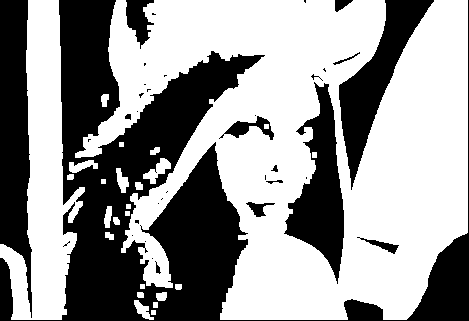

In [ ]:
# utilizando máscara 5x5 com matriz em listas no python
mask = [[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1], 
        [1, 1, 1, 1, 1], 
        [1, 1, 1, 1, 1]]

# fazendo operação de dilatação
mask = Mask(mask)
lena_erosion = dilation(mask, lena)
cv2_imshow(lenat2)

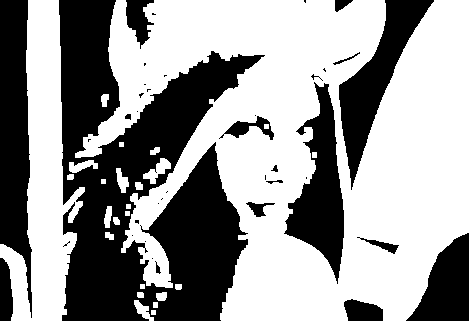

In [ ]:
# utilizando máscara 5x5 do numpy 
# processando dilatação da mesma imagem anterior com opencv
kernel = np.ones((5,5),np.uint8)
img_dilation = cv2.dilate(lena, kernel)
cv2_imshow(img_dilation)

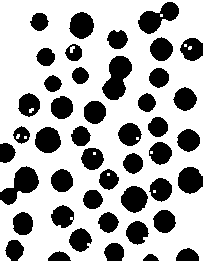

In [ ]:
# utilizando máscara 3x3 com matriz em listas no python
mask = [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]

# fazendo operação de erosão
mask = Mask(mask)
coins_dilatation = dilation(mask, coins)
cv2_imshow(coins_dilatation)

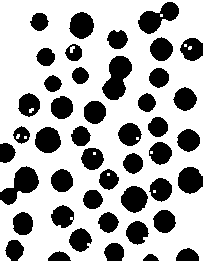

In [ ]:
# utilizando máscara 3x3 do numpy 
# processando erosão da mesma imagem anterior com opencv
kernel = np.ones((3,3),np.uint8)
coins_dilate = cv2.dilate(coins,kernel, iterations=1)
cv2_imshow(coins_dilate)

## Abertura

* A operação de abertura é feita aplicando a operação de erosão e em seguida a de dilatação em uma imagem.


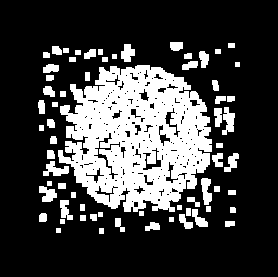

In [188]:
# Utilizando técnica de abertura para imagem ruido com uma máscara de 5x5
mask = [[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1], 
        [1, 1, 1, 1, 1], 
        [1, 1, 1, 1, 1]]
mask = Mask(mask)

# fazendo operação de erosão
result = erosion(mask, ruido)

# fazendo operação de dilatação
result = dilation(mask, result)

# mostrando resultado
cv2_imshow(result)

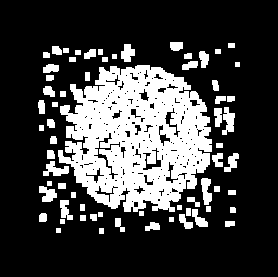

In [186]:
# utilizando máscara 5x5 do numpy 
# processando imagem com técnica de abertura
kernel = np.ones((5,5),np.uint8)
result = cv2.morphologyEx(ruido, cv2.MORPH_OPEN, kernel)
cv2_imshow(result)

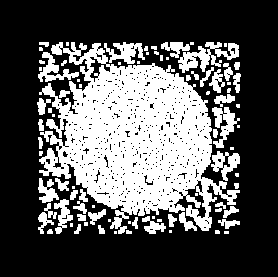

In [190]:
# Utilizando técnica de abertura para imagem ruido com uma máscara de 3x3
mask = [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]
        
mask = Mask(mask)

# fazendo operação de erosão
result = erosion(mask, ruido)

# fazendo operação de dilatação
result = dilation(mask, result)

# mostrando resultado
cv2_imshow(result)

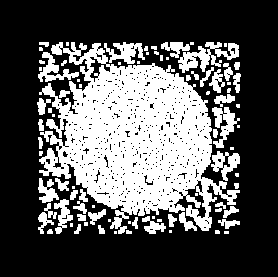

In [191]:
# utilizando máscara 3x3 do numpy 
# processando imagem com técnica de abertura
kernel = np.ones((3,3),np.uint8)
result = cv2.morphologyEx(ruido, cv2.MORPH_OPEN, kernel)
cv2_imshow(result)

## Fechamento

* A operação de fechamento é feita aplicando uma operação de dilatação e em seguida de erosão em uma imagem.

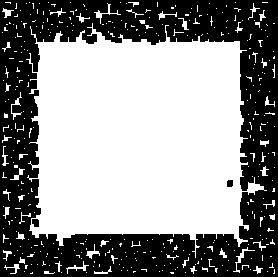

In [198]:
# Utilizando técnica de abertura para imagem ruido com uma máscara de 5x5
mask = [[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1], 
        [1, 1, 1, 1, 1], 
        [1, 1, 1, 1, 1]]
mask = Mask(mask)

# fazendo operação de dilatação
result = dilation(mask, ruido)

# fazendo operação de erosão
result = erosion(mask, result)

# mostrando resultado
cv2_imshow(result)

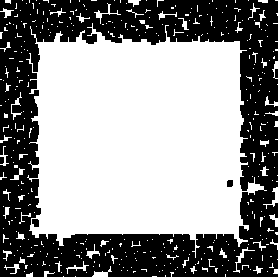

In [196]:
# utilizando máscara 3x3 do numpy 
# processando imagem com técnica de abertura
kernel = np.ones((5,5),np.uint8)
result = cv2.morphologyEx(ruido, cv2.MORPH_CLOSE, kernel)
cv2_imshow(result)

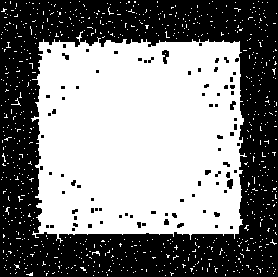

In [199]:
# Utilizando técnica de abertura para imagem ruido com uma máscara de 5x5
mask = [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]
        
mask = Mask(mask)

# fazendo operação de dilatação
result = dilation(mask, ruido)

# fazendo operação de erosão
result = erosion(mask, result)

# mostrando resultado
cv2_imshow(result)

## Implementações extras



*   Melhorar a complexidade das funções implementadas.
*   Preparar técnicas como filtragem morfológica, extração de fronteira, etc.

